# Setup

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# aesthetic matplotlib settings
settings = {'axes.labelsize': 32,
            'xtick.major.size': 8,
            'xtick.major.width': 1.5,
            'xtick.labelsize': 24,
            'xtick.minor.size': 6,
            'xtick.minor.width': 1,
            'ytick.major.size': 10,
            'ytick.major.width': 1.5,
            'ytick.minor.size': 6,
            'ytick.minor.width': 1,
            'ytick.labelsize': 24,
            'legend.fontsize': 18,
            'axes.titlesize': 36,
            'lines.linewidth': 4,
            'lines.markersize': 10,
            'figure.figsize': (15,10)}

In [20]:
def plotIntegerHist(data, title, indices=None, N=10, barLabel='above', filename=None, dpi=200, dy=0.25, fontsize=20):
    heights, xvals = np.histogram(data, bins=np.arange(0, np.max(data), 1))
    plt.bar(xvals[:-1], heights, align='center')
    indices = indices if indices is not None else np.argsort(-heights)[:N]
    plt.ylabel("Num. Models")
    plt.xlabel("Num. BSM Chiral Particles")
    plt.title(title)
    
    if barLabel == 'above':
        rects = [plt.gca().patches[i] for i in indices]
        for rect, label in zip(rects, indices):
            height = rect.get_height()
            plt.gca().text(
                rect.get_x() + rect.get_width() / 2, height + dy, label, ha="center", va="bottom", fontsize=fontsize)
    elif barLabel == 'below':
        indices = np.sort(indices)
        plt.xticks(indices, indices) # works because index = x value for heights
        
    if filename:
        plt.savefig(filename, dpi=dpi, bbox_inches='tight')

    return [heights, xvals, indices]

In [21]:
path = '/Users/sheridan/Academic/model_building'
np1, np2, np3 = [[
    np.array([int(elem) for elem in row[1:-1].split(',')]) 
    for row in open(f'{path}/numParticle{i+1}.txt', 'r').read().split('\n')] for i in range(3)]
NABs = [
    [int(elem) for elem in row[1:-1].split(',')]
    for row in open(f'{path}/NABs.txt', 'r').read().split('\n')]
groups = [
    [int(elem) for elem in row[1:-1].split(',')]
    for row in open(f'{path}/groups.txt', 'r').read().split('\n')]

In [22]:
nps = [np1, np2, np3]
np1_full = np.concatenate(np1)
np2_full = np.concatenate(np2)
np3_full = np.concatenate(np3)
N = 10
nps_full = [np1_full, np2_full, np3_full]

# Figure 1

In [23]:
xvals = [31, 38, 40, 54, 56, 58, 63, 64, 67, 78]
labels1 = [f"SU({g[0]}) x SU({g[1]}) x SU({g[2]})" for g in groups]
labels2 = [''.join(str(a) for a in g) for g in groups]

heights1 = [48, 252, 516, 5124, 1074, 2304+252, 4360, 4920, 3264+336, 18940]
heights2 = [9, 24, 57, 440, 120, 67+48, 353, 537, 93+60, 1008]
heights3 = [2,1,7,17,3,2+1,13,55,4+1,45]

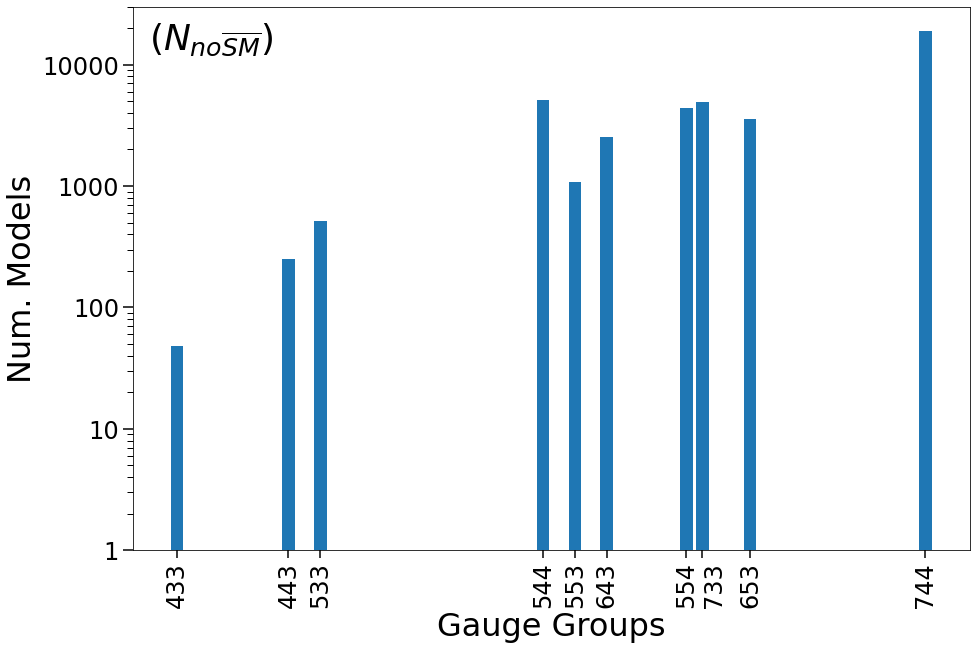

In [24]:
with plt.rc_context(settings):
    plt.bar(xvals, heights1, align='center')
    plt.yscale('log')
    plt.ylim(1, 3e4)
    plt.xticks(xvals, labels2, rotation=90)
    yvals = [1, 10, 100, 1000, 10000]
    plt.yticks(yvals, [str(a) for a in yvals])
    plt.xlabel("Gauge Groups")
    plt.ylabel("Num. Models")
    plt.title(r"$(N_{no\overline{SM}})$", x=0.02, y=0.91, ha='left')
    plt.gca().xaxis.get_majorticklabels()[7].set_horizontalalignment("left")
    plt.savefig(f"./hists/FIG1_summary_plot_case1", dpi=250, bbox_inches='tight')

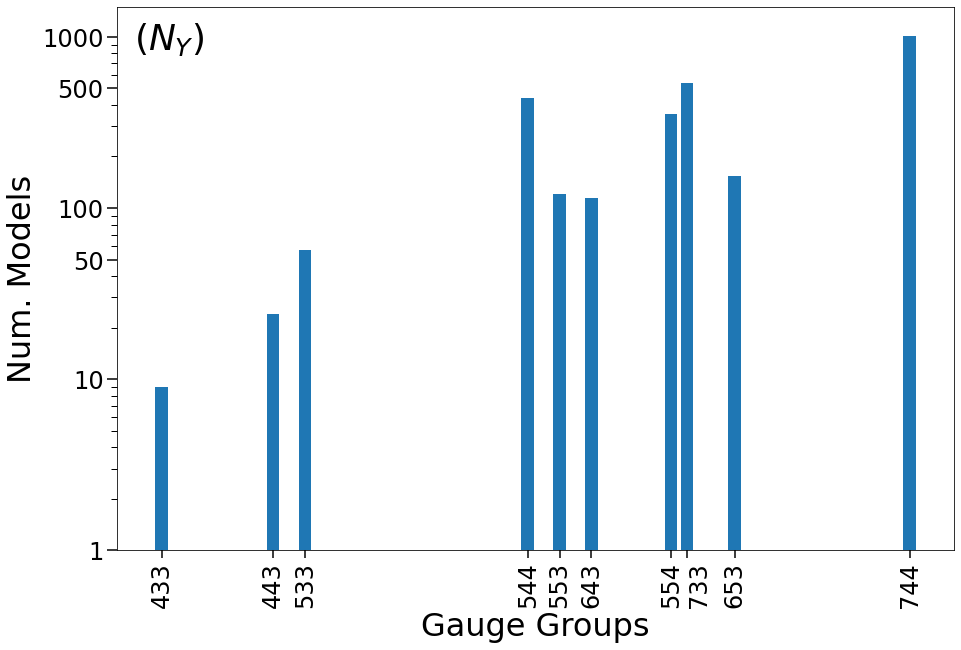

In [25]:
with plt.rc_context(settings):
    plt.bar(xvals, heights2, align='center')
    plt.yscale('log')
    plt.ylim(1, 1.5e3)
    plt.xticks(xvals, labels2, rotation=90)
    yvals = [1, 10, 50, 100, 500, 1000]
    plt.yticks(yvals, [str(a) for a in yvals])
    plt.xlabel("Gauge Groups")
    plt.ylabel("Num. Models")
    plt.title(r"$(N_Y)$", x=0.02, y=0.91, ha='left')
    plt.gca().xaxis.get_majorticklabels()[7].set_horizontalalignment("left")
    plt.savefig(f"./hists/FIG1_summary_plot_case2", dpi=250, bbox_inches='tight')

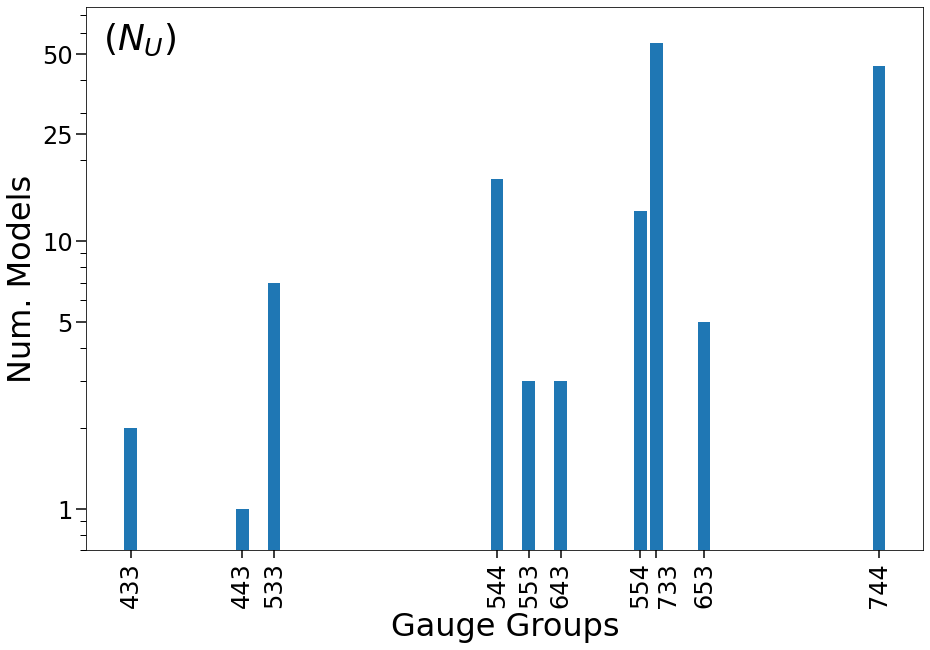

In [26]:
with plt.rc_context(settings):
    plt.bar(xvals, heights3, align='center')
    plt.yscale('log')
    plt.ylim(0.7, 75)
    plt.xticks(xvals, labels2, rotation=90)
    yvals = [1, 5, 10, 25, 50]
    plt.yticks(yvals, [str(a) for a in yvals])
    plt.xlabel("Gauge Groups")
    plt.ylabel("Num. Models")
    plt.title(r"$(N_U)$", x=0.02, y=0.91, ha='left')
    plt.gca().xaxis.get_majorticklabels()[7].set_horizontalalignment("left")
    plt.savefig(f"./hists/FIG1_summary_plot_case3", dpi=250, bbox_inches='tight')

# Figure 2

In [27]:
indicess = [
    [0, 11, 15, 24, 30, 45, 48, 63, 72, 105],
    [0, 11, 15, 24, 30, 45, 48, 63, 84, 103],
    [0, 11, 15, 24, 30, 45, 48, 61, 81, 105]
]
titles = [r"$(N_{no\overline{SM}})$", r"$(N_Y)$", r"$(N_U)$"]
ylims = [5900, 325, 15]

with plt.rc_context(settings):
    for i, (data, dy, indices, title, ylim) in enumerate(zip(nps_full, [8, 2, 0.1], indicess, titles, ylims)):
        plotIntegerHist(data, 
                        title="",
                        indices=indices,
                        N=10, 
                        barLabel='above',
                        filename=None, 
                        dy=dy)
        plt.title(title, x=0.98, y=0.91, ha='right')
        plt.gca().set_xticks(np.arange(0, 120, 10))
        plt.gca().set_xticks(np.arange(5, 110, 10), minor=True)
        plt.ylim(0, ylim)
        plt.savefig(f"./hists/FIG2_case{i+1}_allNABs_finebin", dpi=200, bbox_inches='tight')
        plt.clf();

<Figure size 1080x720 with 0 Axes>

# Figure 3

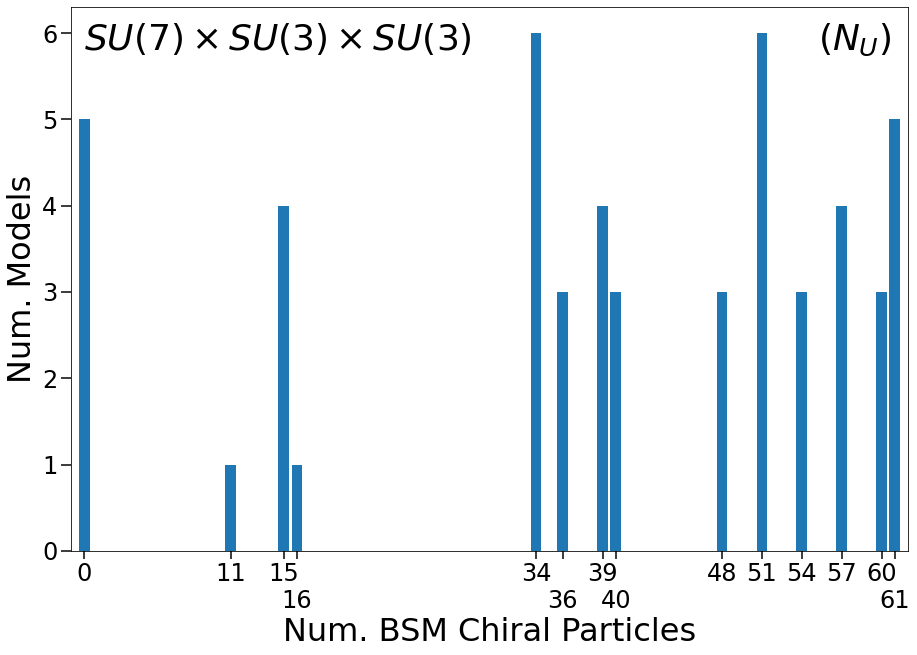

In [28]:
with plt.rc_context(settings):
    plotIntegerHist(np3[-4], 
                    title="",
                    N=14, 
                    barLabel='below', 
                    dy=0.1);
                    # filename=f"./hists/case{i+1}_{''.join(str(x) for x in nab)}_finebin", 
                    #dy=200);
    plt.title(r"$(N_U)$", x=0.98, y=0.91, ha='right')
    plt.xlim(-1, 62)
    plt.text(x=0, y=5.8, s=r"$SU(7) \times SU(3) \times SU(3)$", fontsize=36)
    
    for i, tick in enumerate(plt.gca().xaxis.get_major_ticks()):
        if i in [3, 5, 7, 13]:
            tick.set_pad(30)
    plt.savefig(f"./hists/FIG3_case3_733_finebins", dpi=250)